In [13]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

On se propose de simuler numériquement les résultats théoriques obtenu précédement. Pour ce faire l'on a besoin d'un forme explicite de la fonction d'utilité $v()$, qui soit croissante concave, on a donc choisi $v(\cdot)=\sqrt(\cdot)$. Les cellules qui suivent permettent de déterminer les quantités optimales consommées, en comparant $\alpha$ à $\frac{p_{1}}{p_{2}}$ et de calculer l'utilité indirecte en fonction de $(\alpha,\theta)$ et du panier de consommation optimal.

In [14]:
def conso(param,p1,p2,I):
    c=[]
    for (alpha,theta) in param:
        if alpha < p1/p2:
            c2 = (theta/(2*p2))**2
            c1 = 0
        else:
            c2= 0
            c1 = (alpha*theta**2)/(4*p1**2)
        c0 = I - p1*c1 - p2*c2
        c += [((alpha,theta),(c0,c1,c2))]
    return(c)

In [15]:
def utilite(param,c):
    U = []
    for i in range(len(c)):
        c0,c1,c2 = c[i][1]
        alpha,theta = c[i][0]
        U += [c0 + theta*np.sqrt(alpha*c1 +c2)]
        
    return U

On fixe le revenu $I$ ainsi que les prix $p_{1}$ et $p_{2}$.

In [16]:
I = 8
p1 = 0.002
p2 = 0.006
#theta = 2

On fixe $N$ le nombre d'individu dans la population et on tire aléatoirement des couples $(\alpha,\theta)$ avec $\alpha \sim \mathcal{U}([0,1])$ et $\theta \sim \mathcal{U}([1,2])$.

In [17]:
N = 10000
param = [(rd.uniform(0,1),rd.uniform(1,2)) for i in range(N)]

Les paniers de consommation et utilité à l'optimum en *laissez faire* sont donnés par c_LF et V_LF.

In [18]:
c_LF = conso(param,p1,p2,I)
V_LF = utilite(param,c_LF)

On fixe une taxe $t$ et on détermine les paniers de consommation et utilité à l'optimum avec la taxe.

In [65]:
t = 0.001
c_tax = conso(param,p1+t,p2,I)
V_tax = utilite(param,c_tax)
V_tax[:5]

[101.69513244495872,
 103.16664893673037,
 104.31581538114776,
 222.73452727130334,
 134.81764944257884]

On isole la quantités totale de bien carboné (c1) consommée avec de calculer le transfert T qui sera redistribué.

In [66]:
carbon = [c_tax[i][1][1] for i in range(len(c_tax))]
C1 = sum(carbon)
T=t*C1/N

On calcule $\Delta V(p_{1},p_{2},\alpha,\theta,t)$ la variation d'utilité indirecte. On trace sa valeur en fonction de $\alpha$.

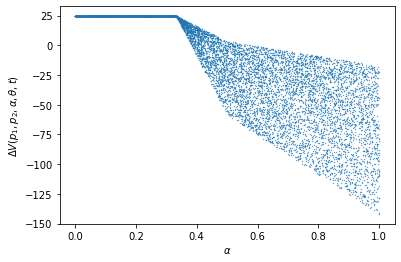

In [201]:
deltaV = [ T + V_tax[i] - V_LF[i] for i in range(len(V_tax))]

alpha_list = [param[i][0] for i in range(len(param))]
theta_list = [param[i][1] for i in range(len(param))]

plt.scatter(alpha_list,deltaV,s=0.1)
#plt.title("Simple carbon tax (t=0.001)")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$')
plt.savefig('Carbon_tax.pdf')
plt.show()

On rassemble tout ça dans une seule fonction.

In [70]:
def carbon_tax(t):    
    c_LF = conso(param,p1,p2,I)
    V_LF = utilite(param,c_LF)

    c_tax = conso(param,p1+t,p2,I)
    V_tax = utilite(param,c_tax)
    V_tax[:5]

    carbon = [c_tax[i][1][1] for i in range(len(c_tax))]
    C1 = sum(carbon)
    T=t*C1/N

    deltaV = [ T + V_tax[i] - V_LF[i] for i in range(len(V_tax))]

    return(deltaV)

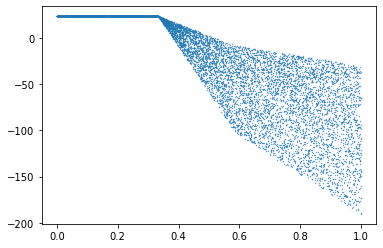

In [71]:
deltaV = carbon_tax(t=0.0015)
plt.scatter(alpha_list,deltaV, s=0.1)
plt.show()

In [ ]:
Cellule indépendante, pour tracer la consommation totale de c1 en fonction de la taxe
#p1=2
#p2=6
#N = 100
#param = [(rd.uniform(0,1),rd.uniform(1,2)) for i in range(N)]
#t_list = list(np.linspace(0,4,100))
#C1 = [sum([conso(param,p1+t,p2,I)[i][1][1] for i in range(N)]) for t in t_list]
#plt.plot(C1,t_list)

## Illusion fiscale

On suppose désormais que les individus sont pessimistes vis à vis d'un transfert forfaitaire et ne pensent toucher que $\beta T < T$.

In [173]:
beta = 0.25
deltaV = carbon_tax(t=0.0010)
deltaV_fiscal_illusion = [beta*T + V_tax[i]-V_LF[i] for i in range(len(V_tax))]

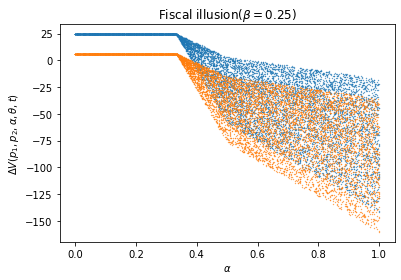

In [189]:
plt.scatter(alpha_list,deltaV,s=0.1)
plt.scatter(alpha_list,deltaV_fiscal_illusion,s=0.1)
plt.title('Fiscal illusion' '(' r'$\beta = 0.25$'')')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$')
plt.savefig('Fiscal_illusion.pdf')
plt.show()

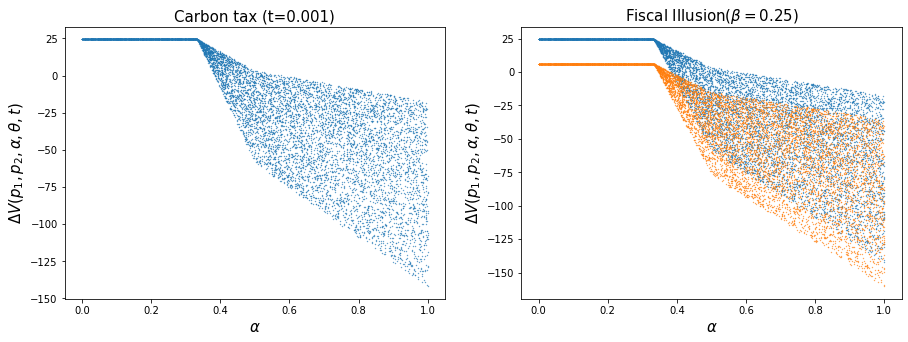

In [217]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(alpha_list,deltaV, s=0.1)

plt.title("Carbon tax (t=0.001)",fontdict = {'fontsize' : 15})
plt.xlabel(r'$\alpha$',fontdict = {'fontsize' : 15})
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$',fontdict = {'fontsize' : 15})

plt.subplot(1,2,2)
plt.scatter(alpha_list,deltaV, s=0.1)
plt.scatter(alpha_list,deltaV_fiscal_illusion,s=0.1)

plt.title('Fiscal Illusion' '(' r'$\beta = 0.25$'')',fontdict = {'fontsize' : 15})
plt.xlabel(r'$\alpha$',fontdict = {'fontsize' : 15})
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$',fontdict = {'fontsize' : 15})

plt.savefig('Carbon_tax_and_fiscal_illusion.png')
plt.show()

In [27]:
def illusion_fiscale(t,beta):
    c_tax = conso(param,p1+t,p2,I)
    V_tax = utilite(param,c_tax)
    
    carbon = [c_tax[i][1][1] for i in range(len(c_tax))]
    C1 = sum(carbon)
    T=t*C1/N
    
    beta = 0.4
    deltaV_fiscal_illusion = [beta*T + V_tax[i]-V_LF[i] for i in range(len(V_tax))]
    
    return(deltaV_fiscal_illusion)

## Bonus-Malus

Désormais le revenu généré par la taxe carbone (sur le bien c1) est utilisé pour subventionner le coût du bien décarboné (c2).
On fixe $t$ et l'on cherche par dichtomie la subvention $\tilde{t}$ qui équilibre le budget du gouvernement.

In [28]:
def diff_conso_dicho(t,t_tilde):
    c =  conso(param,p1+t,p2-t_tilde,I)
    C1 = sum([c[i][1][1] for i in range(len(c))])
    C2 = sum([c[i][1][2] for i in range(len(c))])
    return(t*C1 - t_tilde*C2)

In [163]:
#t = 0.6
p1 = 0.002
p2 = 0.006
t = 0.0012
t_tilde_low = 0
t_tilde_high = 0.0029
t_tilde = (t_tilde_low + t_tilde_high)/2

epsilon = 0.000001

while abs(t_tilde_high - t_tilde_low) > epsilon:
    t_tilde = (t_tilde_low + t_tilde_high)/2
    if diff_conso_dicho(t,t_tilde_low)*diff_conso_dicho(t,t_tilde) >= 0:
        t_tilde_low = t_tilde
    else:
        t_tilde_high = t_tilde
t_tilde

0.0011476806640624997

In [164]:
diff_conso_dicho(t,t_tilde)

-11.474823028867831

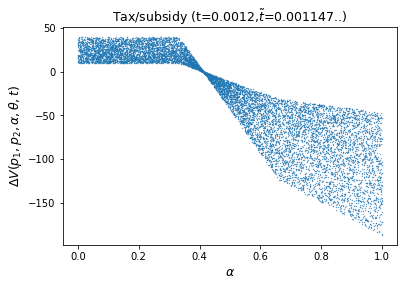

In [218]:
c_lf = conso(param,p1,p2,I)
V_lf = utilite(param,c_lf)

c_bonus_malus = conso(param,p1+t,p2-t_tilde,I)
V_bonus_malus = utilite(param,c_bonus_malus)

deltaV_bonus_malus = [V_bonus_malus[i]-V_lf[i] for i in range(N)]
plt.scatter(alpha_list,deltaV_bonus_malus, s=0.1)
plt.title('Tax/subsidy (t=0.0012'',' r'$\tilde{t}$''=0.001147..)',fontdict = {'fontsize' : 12.5})
plt.xlabel(r'$\alpha$',fontdict = {'fontsize' : 12.5})
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$',fontdict = {'fontsize' : 12.5})
plt.savefig('Tax_subsidy.png')
plt.show()

In [32]:
def bonus_malus(t,t_tilde_low,t_tilde_high,epsilon):
    t_tilde = (t_tilde_low + t_tilde_high)/2

    while abs(t_tilde_high - t_tilde_low) > epsilon:
        t_tilde = (t_tilde_low + t_tilde_high)/2
        if diff_conso_dicho(t,t_tilde_low)*diff_conso_dicho(t,t_tilde) >= 0:
            t_tilde_low = t_tilde
        else:
            t_tilde_high = t_tilde
            
    c_lf = conso(param,p1,p2,I)
    V_lf = utilite(param,c_lf)

    c_bonus_malus = conso(param,p1+t,p2-t_tilde,I)
    V_bonus_malus = utilite(param,c_bonus_malus)

    deltaV_bonus_malus = [V_bonus_malus[i]-V_lf[i] for i in range(N)]
    
    return(deltaV_bonus_malus)

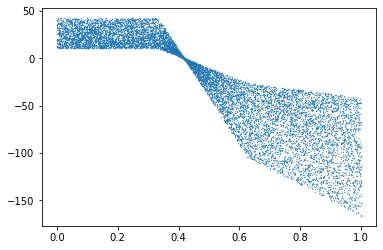

In [33]:
deltaV_bonus_malus = bonus_malus(t=0.001,t_tilde_low=0,t_tilde_high=0.0059,epsilon=0.000001)
plt.scatter(alpha_list,deltaV_bonus_malus, s=0.1)
plt.show()

## Le coût fixe

On suppose qu'il existe un coût fixe à consommer le bien c2.

In [34]:
def conso_cout_fixe(param,p1,p2,I,cf):
    c=[]
    U=[]
    for (alpha,theta) in param:
            c2 = (theta/(2*p2))**2
            c1 = 0
            c0 = I - p1*c1 - p2*c2 - cf
            panier_decarbone = [((alpha,theta),(c0,c1,c2))]
            u_c2 = utilite(param,panier_decarbone)
            
            c2 = 0
            c1 = (alpha*theta**2)/(4*p1**2)
            c0 = I - p1*c1 - p2*c2
            panier_carbone = [((alpha,theta),(c0,c1,c2))]
            u_c1 = utilite(param,panier_carbone)
            
            if u_c2 > u_c1:
                c+= panier_decarbone
                U +=[u_c2]
            else:
                c+= panier_carbone
                U+=[u_c1]
    return(c,U)

In [35]:
cf = 25
t = 0.001
c_cout_fixe = conso_cout_fixe(param,p1,p2,I,cf)[0]
V_cout_fixe = conso_cout_fixe(param,p1,p2,I,cf)[1]

c_tax_cf = conso_cout_fixe(param,p1+t,p2,I,cf)[0] 
V_tax_cf = conso_cout_fixe(param,p1+t,p2,I,cf)[1] 

carbon = [c_tax_cf[i][1][1] for i in range(len(c_tax))]
C1 = sum(carbon)
T=t*C1/N

In [36]:
deltaV_cout_fixe = [T + V_tax_cf[i][0]-V_cout_fixe[i][0] for i in range(N)]

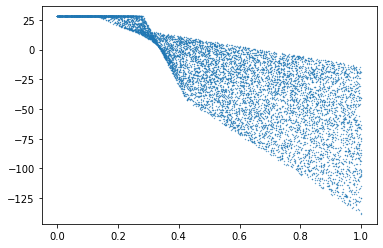

In [37]:
plt.scatter(alpha_list,deltaV_cout_fixe, s=0.1)
plt.show()

In [38]:
def cout_fixe(t,cf):
    c_cout_fixe = conso_cout_fixe(param,p1,p2,I,cf)[0]
    V_cout_fixe = conso_cout_fixe(param,p1,p2,I,cf)[1]

    c_tax_cf = conso_cout_fixe(param,p1+t,p2,I,cf)[0] 
    V_tax_cf = conso_cout_fixe(param,p1+t,p2,I,cf)[1] 

    carbon = [c_tax_cf[i][1][1] for i in range(len(c_tax))]
    C1 = sum(carbon)
    T=t*C1/N
    
    deltaV_cout_fixe = [T + V_tax_cf[i][0]-V_cout_fixe[i][0] for i in range(N)]
    
    return(deltaV_cout_fixe)

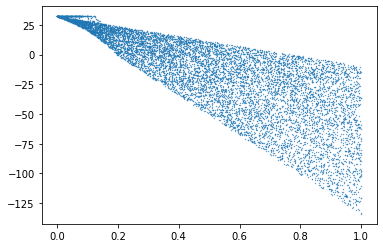

In [39]:
deltaV_cout_fixe = cout_fixe(t=0.001,cf=100)
plt.scatter(alpha_list,deltaV_cout_fixe, s=0.1)
plt.show()

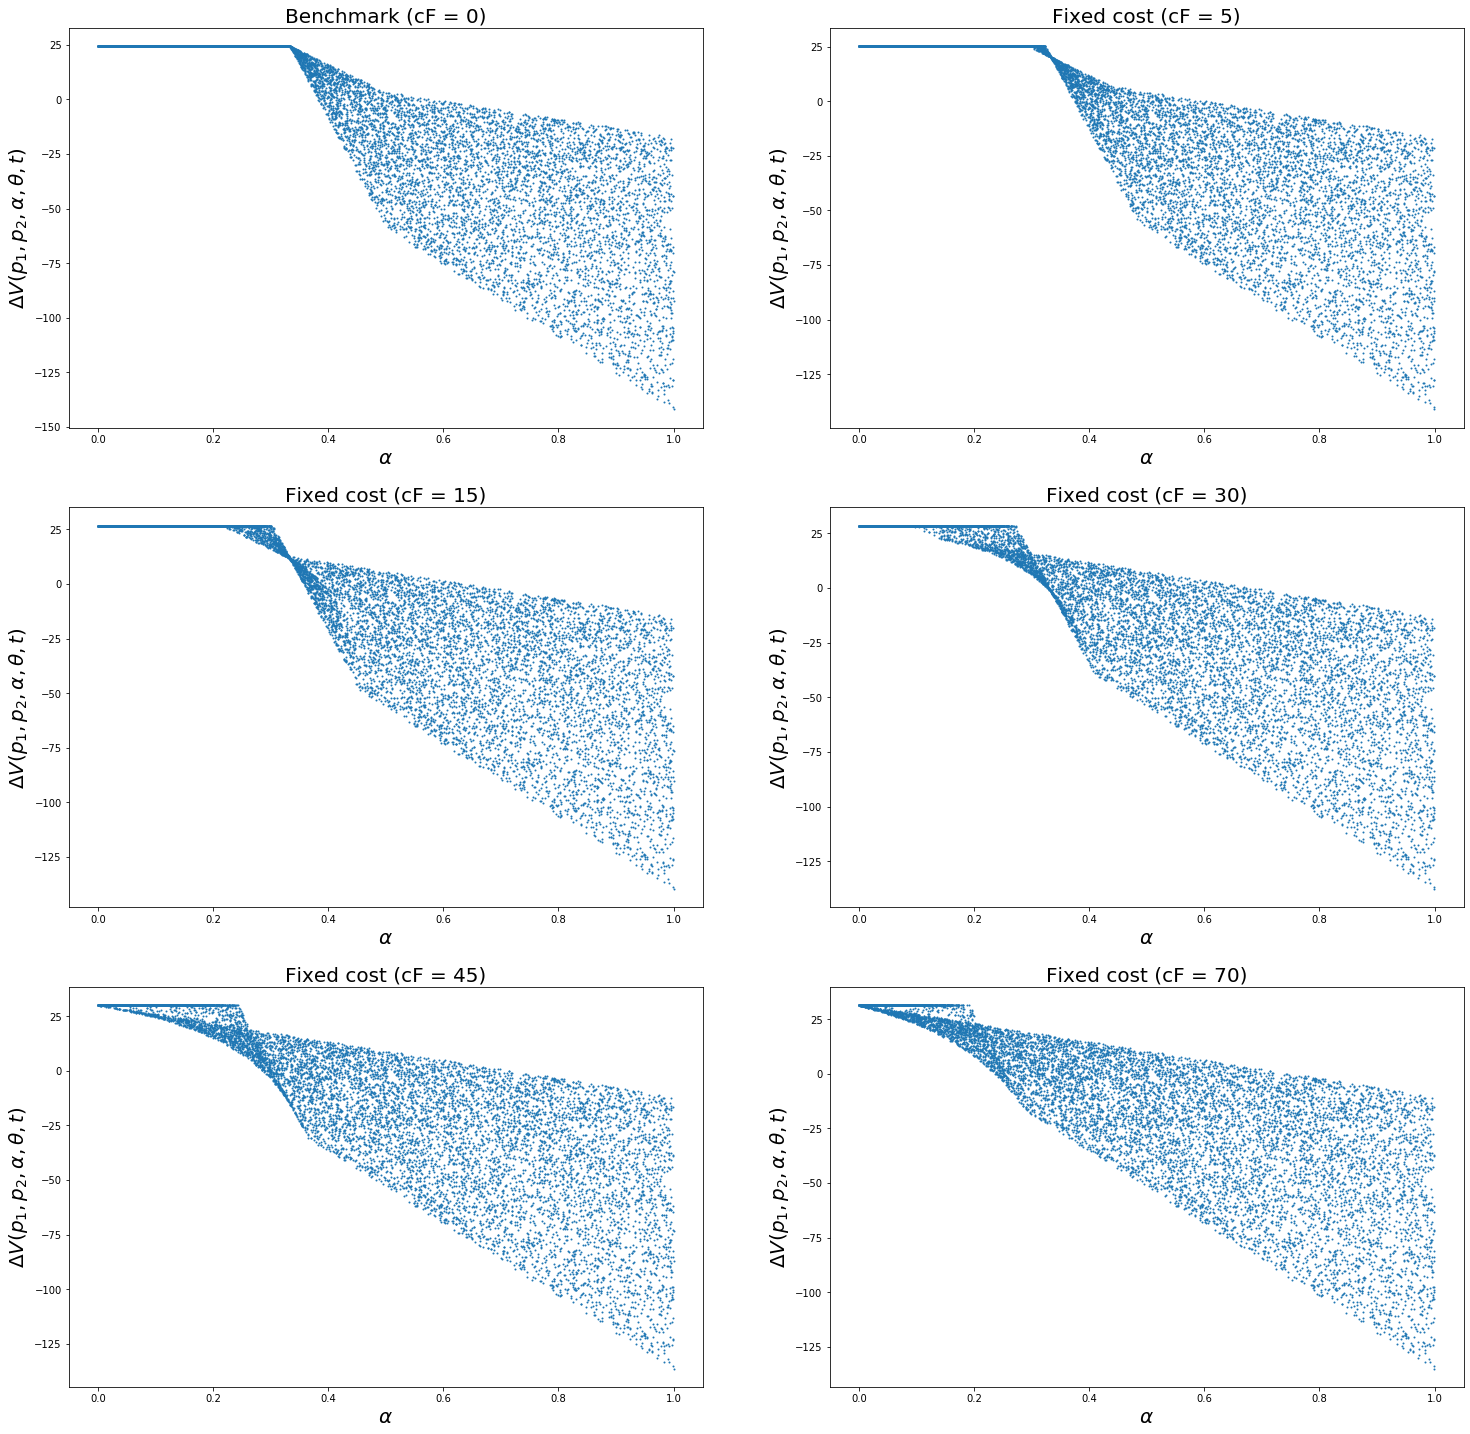

In [220]:
plt.figure(figsize=(25,25))

plt.subplot(3,2,1)
plt.scatter(alpha_list,deltaV, s=1)

plt.title("Benchmark (cF = 0)",fontdict = {'fontsize' : 20})
plt.xlabel(r'$\alpha$',fontdict = {'fontsize' : 20})
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$',fontdict = {'fontsize' : 20})

plt.subplot(3,2,2)
deltaV_cout_fixe = cout_fixe(t=0.001,cf=5)
plt.scatter(alpha_list,deltaV_cout_fixe, s=1)

plt.title("Fixed cost (cF = 5)",fontdict = {'fontsize' : 20})
plt.xlabel(r'$\alpha$',fontdict = {'fontsize' : 20})
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$',fontdict = {'fontsize' : 20})

plt.subplot(3,2,3)
deltaV_cout_fixe = cout_fixe(t=0.001,cf=15)
plt.scatter(alpha_list,deltaV_cout_fixe, s=1)

plt.title("Fixed cost (cF = 15)",fontdict = {'fontsize' : 20})
plt.xlabel(r'$\alpha$',fontdict = {'fontsize' : 20})
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$',fontdict = {'fontsize' : 20})

plt.subplot(3,2,4)
deltaV_cout_fixe = cout_fixe(t=0.001,cf=30)
plt.scatter(alpha_list,deltaV_cout_fixe, s=1)

plt.title("Fixed cost (cF = 30)",fontdict = {'fontsize' : 20})
plt.xlabel(r'$\alpha$',fontdict = {'fontsize' : 20})
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$',fontdict = {'fontsize' : 20})

plt.subplot(3,2,5)
deltaV_cout_fixe = cout_fixe(t=0.001,cf=45)
plt.scatter(alpha_list,deltaV_cout_fixe, s=1)

plt.title("Fixed cost (cF = 45)",fontdict = {'fontsize' : 20})
plt.xlabel(r'$\alpha$',fontdict = {'fontsize' : 20})
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$',fontdict = {'fontsize' : 20})

plt.subplot(3,2,6)
deltaV_cout_fixe = cout_fixe(t=0.001,cf=70)
plt.scatter(alpha_list,deltaV_cout_fixe, s=1)

plt.title("Fixed cost (cF = 70)",fontdict = {'fontsize' : 20})
plt.xlabel(r'$\alpha$',fontdict = {'fontsize' : 20})
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$',fontdict = {'fontsize' : 20})

plt.savefig('Fixed_cost_all.png')
plt.show()

## Tracé de courbes

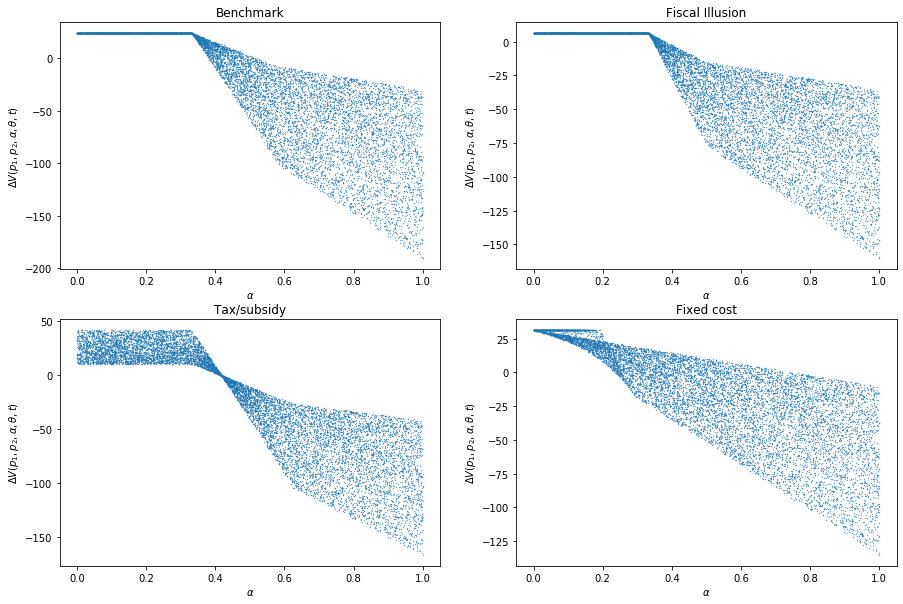

In [49]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(alpha_list,deltaV, s=0.1)

plt.title("Benchmark")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$')

plt.subplot(2,2,2)
plt.scatter(alpha_list,deltaV_fiscal_illusion,s=0.1)

plt.title("Fiscal Illusion")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$')

plt.subplot(2,2,3)
plt.scatter(alpha_list,deltaV_bonus_malus, s=0.1)

plt.title("Tax/subsidy")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$')

plt.subplot(2,2,4)
plt.scatter(alpha_list,deltaV_cout_fixe, s=0.1)

plt.title("Fixed cost")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Delta V(p_{1},p_{2},\alpha,\theta,t)$')

plt.show()